In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib

hfont = {'fontname':'Times New roman'}



In [2]:
local_sol = ['S0927', 'S1306', 'U0148', 'U1319']
real = pd.read_csv('/Users/alex/Desktop/final_files/correct_precision/paper2/all_components_file_with_completeness_sep11.csv')

element = 'CIV'
min_rest = 1550.0


c4_systems = real.loc[(real.element ==  element) & 
                      (real.rest_l < min_rest) &
                      (real.s5 >= 0.50)]
c4_systems = c4_systems.set_index([list(range(len(c4_systems.c_d)))])

# c4 norm, path and a norm parameters
c4_norm = 0.77*pow(10, -22)

dx_z1 =  12.368045564
dx_z2 =  14.4195335701

a_z1 = 1.4713318177972192
a_z2 = 2.291532761137389

zmin = [4.35, 5.19]
zmax = [5.19, 6.13]



/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 55 + 1) instead
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead


1.14185135657e-08 3.32360994015e-08


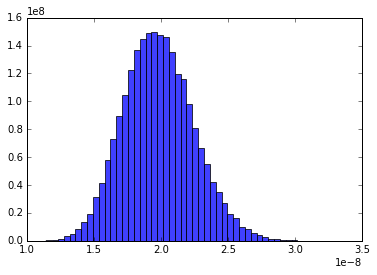

In [29]:
# bootstrap zbin1_c4
local_total_N_s5 = np.zeros(50000)

z = 0
local_c4_systems = c4_systems.loc[(c4_systems.z >= zmin[z]) & (c4_systems.z < zmax[z])]

local_c4_systems_cd   = np.array(local_c4_systems.c_d)
local_c4_systems_low  = np.array(local_c4_systems.cd_low)
local_c4_systems_high = np.array(local_c4_systems.cd_high)



len5 = len(local_c4_systems.z)
temp_systems = np.zeros(len5)

for i in range(0, len(local_total_N_s5)):
    for x in range(0, len5):
        random_index = np.random.random_integers(0, len5-1)
        choice = np.random.random_integers(0, 3)

        if choice < 1: 
            temp_systems[x]= local_c4_systems_cd[random_index]
        if (choice >0) & (choice<2): 
            temp_systems[x] = local_c4_systems_low[random_index]
        if choice >1: 
            temp_systems[x] = local_c4_systems_high[random_index]
    local_total_N_s5[i] = sum((pow(10.0, temp_systems)))   


# plot and get the omega histogram values
local_omega_s5 = local_total_N_s5*a_z1*c4_norm/dx_z1
n, bins, patches = plt.hist(local_omega_s5, 50, normed=1, facecolor='blue', alpha=0.75)
print(min(local_omega_s5), max(local_omega_s5))

omega value:  1.72389472744e-08
66% boundary is:  1.62183824495e-08 2.23273064836e-08


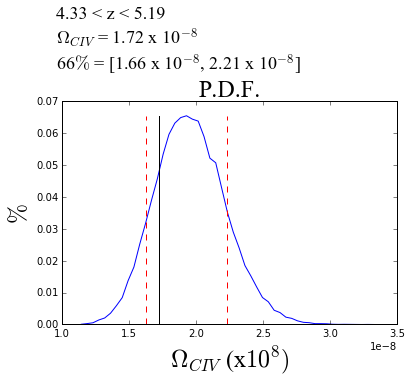

In [30]:
# create pdf and get 66% interval
pdf = np.zeros(len(bins))
for b in range(0, len(bins) - 1):
    local_index = np.where((local_omega_s5 >= bins[b]) & (local_omega_s5 < bins[b+1]))
    pdf[b] = len(local_omega_s5[local_index])
    
total_pdf = sum(pdf)
for p in range(0, len(pdf) - 1):
    pdf[p] = pdf[p]/total_pdf

# plot and check the pdf
plt.plot(bins, pdf)

# get the where the maximum value is located at  
# and dereference the np.where call into an array
max_index = np.where(pdf == max(pdf))
index_array = np.array(list(range(len(pdf))))
a = np.array(index_array[max_index])

# use a do while loop to calculate the 66% boundary interval
step = 1.0
boundary = sum(pdf[a])
while boundary <= 0.66:
    boundary = boundary + pdf[np.int(a[0]-step)]  + pdf[np.int(a[0]+step)] 
    step = step + 1


omega_value = sum(pow(10.0, local_c4_systems.c_d))*a_z1*c4_norm/dx_z1

plt.plot([bins[np.int(a[0]-step)], bins[np.int(a[0]-step)]], 
         [0, max(pdf)], 'r--')
plt.plot([bins[np.int(a[0]+step)], bins[np.int(a[0]+step)]], 
         [0, max(pdf)], 'r--')
plt.plot([omega_value, omega_value], 
         [0, max(pdf)], 'k-')

#plot labels
plt.ylabel('$\%$', **hfont,  fontsize=24)
plt.xlabel('$\Omega_{CIV}$ (x$10^8)$', **hfont,  fontsize=24)
plt.title('P.D.F.',  **hfont,  fontsize=24)
plt.text(0.95*10.0**(-8), 0.096, '4.33 < z < 5.19', **hfont,  fontsize=18)
plt.text(0.95*10.0**(-8), 0.088, '$\Omega_{CIV}$ = 1.72 x 10$^{-8}$', **hfont,  fontsize=18)
plt.text(0.95*10.0**(-8), 0.08, '66$\%$ = [1.66 x 10$^{-8}$, 2.21 x 10$^{-8}$]', **hfont,  fontsize=18)


print('omega value: ', omega_value)
print('66% boundary is: ', bins[np.int(a[0]-step)], bins[np.int(a[0]+step)])


plt.savefig('c4_z1_bootstrap.png', bbox_inches='tight', figsize=[12,9], dpi=500)


/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 6 + 1) instead
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead


1.14939308305e-09 1.06654245546e-08


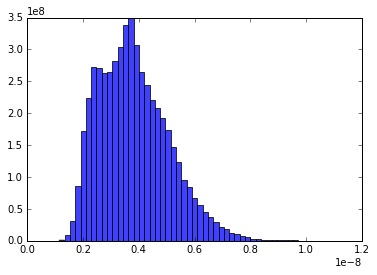

In [31]:
# bootstrap zbin2_c4
local_total_N_s5 = np.zeros(50000)

z = 1
local_c4_systems = c4_systems.loc[(c4_systems.z >= zmin[z]) & (c4_systems.z < zmax[z])]
local_c4_systems = local_c4_systems.set_index([list(range(len(local_c4_systems.c_d)))])

local_c4_systems_cd   = np.array(local_c4_systems.c_d)
local_c4_systems_low  = np.array(local_c4_systems.cd_low)
local_c4_systems_high = np.array(local_c4_systems.cd_high)


len5 = len(local_c4_systems.z)
temp_systems = np.zeros(len5)

for i in range(0, len(local_total_N_s5)):
    for x in range(0, len5):
        random_index = np.random.random_integers(0, len5-1)
        choice = np.random.random_integers(0, 3)

        if choice < 1: 
            temp_systems[x]= local_c4_systems_cd[random_index]
        if (choice >0) & (choice<2): 
            temp_systems[x] = local_c4_systems_low[random_index]
        if choice >1: 
            temp_systems[x] = local_c4_systems_high[random_index]
    local_total_N_s5[i] = sum((pow(10.0, temp_systems)))   


local_omega_s5 = local_total_N_s5*a_z2*c4_norm/dx_z2
# the histogram
n, bins, patches = plt.hist(local_omega_s5, 50, normed=1, facecolor='blue', alpha=0.75)

print(min(local_omega_s5), max(local_omega_s5))




omega value:  3.45360003035e-09
66% boundary is:  2.29131685964e-09 4.95580567169e-09


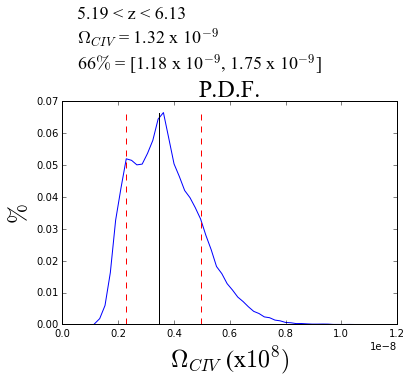

In [32]:
# create pdf and get 66% interval
pdf = np.zeros(len(bins))
for b in range(0, len(bins) - 1):
    local_index = np.where((local_omega_s5 >= bins[b]) & (local_omega_s5 < bins[b+1]))
    pdf[b] = len(local_omega_s5[local_index])
    
total_pdf = sum(pdf)
for p in range(0, len(pdf) - 1):
    pdf[p] = pdf[p]/total_pdf

# plot and check the pdf
plt.plot(bins, pdf)

# get the where the maximum value is located at  
# and dereference the np.where call into an array
max_index = np.where(pdf == max(pdf))
index_array = np.array(list(range(len(pdf))))
a = np.array(index_array[max_index])

# use a do while loop to calculate the 66% boundary interval
step = 1.0
boundary = sum(pdf[a])
while boundary <= 0.66:
    boundary = boundary + pdf[np.int(a[0]-step)]  + pdf[np.int(a[0]+step)] 
    step = step + 1

omega_value = sum(pow(10.0, local_c4_systems.c_d))*a_z2*c4_norm/dx_z2
    
plt.plot([bins[np.int(a[0]-step)], bins[np.int(a[0]-step)]], 
         [0, max(pdf)], 'r--')
plt.plot([bins[np.int(a[0]+step)], bins[np.int(a[0]+step)]], 
         [0, max(pdf)], 'r--')
plt.plot([omega_value, omega_value], 
         [0, max(pdf)], 'k-')
#plot labels
plt.ylabel('$\%$', **hfont,  fontsize=24)
plt.xlabel('$\Omega_{CIV}$ (x$10^8)$', **hfont,  fontsize=24)
plt.title('P.D.F.',  **hfont,  fontsize=24)
plt.text(0.512*10.0**(-9), 0.096, '5.19 < z < 6.13', **hfont,  fontsize=18)
plt.text(0.512*10.0**(-9), 0.088, '$\Omega_{CIV}$ = 1.32 x 10$^{-9}$', **hfont,  fontsize=18)
plt.text(0.512*10.0**(-9), 0.08, '66$\%$ = [2.29 x 10$^{-9}$, 1.75 x 10$^{-9}$]', **hfont,  fontsize=18)

plt.savefig('c4_z2_bootstrap.png', bbox_inches='tight', figsize=[12,9], dpi=500)

print('omega value: ', omega_value)
print('66% boundary is: ', bins[np.int(a[0]-step)], bins[np.int(a[0]+step)])

# SiIV omega bootstrap

In [3]:
element = 'SiIV'
min_rest = 1395.0

si4_systems = real.loc[(real.element ==  element) & 
                      (real.rest_l < min_rest) &
                      (real.s5 >= 0.50)]
si4_systems = si4_systems.set_index([list(range(len(si4_systems.c_d)))])

# si4 norm, path and a norm parameters
si4_norm = 0.77*pow(10, -22)*28.0855/12.0107 

dx_z1 =  1.91803671035
dx_z2 = 14.4195335701

a_z1 = 2.1225512271113907
a_z2 = 1.19589816795222

zmin = [4.93, 5.19]
zmax = [5.19, 6.13]

/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead


omega value:  4.33695897448e-09
1.37637199304e-09 7.89834003557e-09


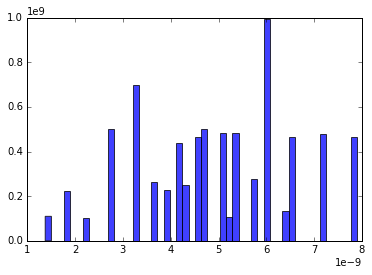

In [4]:
# bootstrap zbin1_si5
local_total_N_s5 = np.zeros(10000)

z = 0
local_si4_systems = si4_systems.loc[(si4_systems.z >= zmin[z]) & (si4_systems.z < zmax[z])]
local_si4_systems = local_si4_systems.set_index([list(range(len(local_si4_systems.c_d)))])

local_si4_systems_cd   = np.array(local_si4_systems.c_d)
local_si4_systems_low  = np.array(local_si4_systems.cd_low)
local_si4_systems_high = np.array(local_si4_systems.cd_high)


len5 = len(local_si4_systems.z)
temp_systems = np.zeros(len5)

for i in range(0, len(local_total_N_s5)):
    for x in range(0, len5):
        random_index = np.random.random_integers(0, len5-1)
        choice = np.random.random_integers(0, 3)

        if choice < 1: 
            temp_systems[x]= local_si4_systems_cd[random_index]
        if (choice >0) & (choice<2): 
            temp_systems[x] = local_si4_systems_low[random_index]
        if choice >1: 
            temp_systems[x] = local_si4_systems_high[random_index]
    local_total_N_s5[i] = sum((pow(10.0, temp_systems)))   



# plot and get the omega histogram values
local_omega_s5 = local_total_N_s5*a_z1*si4_norm/dx_z1
n, bins, patches = plt.hist(local_omega_s5, 50, normed=1, facecolor='blue', alpha=0.75)
omega_value = sum(pow(10.0, local_si4_systems.c_d))*a_z1*si4_norm/dx_z1
print('omega value: ', omega_value)

print(min(local_omega_s5), max(local_omega_s5))

/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 8 + 1) instead
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead


omega value:  1.4257081076e-09
4.08776821256e-10 4.3708040041e-09


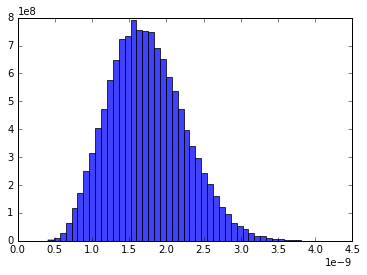

In [5]:
# bootstrap zbin1_si5
local_total_N_s5 = np.zeros(50000)

z = 1
local_si4_systems = si4_systems.loc[(si4_systems.z >= zmin[z]) & (si4_systems.z < zmax[z])]
local_si4_systems = local_si4_systems.set_index([list(range(len(local_si4_systems.c_d)))])


local_si4_systems_cd   = np.array(local_si4_systems.c_d)
local_si4_systems_low  = np.array(local_si4_systems.cd_low)
local_si4_systems_high = np.array(local_si4_systems.cd_high)


len5 = len(local_si4_systems.z)
temp_systems = np.zeros(len5)

for i in range(0, len(local_total_N_s5)):
    for x in range(0, len5):
        random_index = np.random.random_integers(0, len5-1)
        choice = np.random.random_integers(0, 3)

        if choice < 1: 
            temp_systems[x]= local_si4_systems_cd[random_index]
        if (choice >0) & (choice<2): 
            temp_systems[x] = local_si4_systems_low[random_index]
        if choice >1: 
            temp_systems[x] = local_si4_systems_high[random_index]
    local_total_N_s5[i] = sum((pow(10.0, temp_systems)))   





# plot and get the omega histogram values
local_omega_s5 = local_total_N_s5*a_z2*si4_norm/dx_z2
n, bins, patches = plt.hist(local_omega_s5, 50, normed=1, facecolor='blue', alpha=0.75)
omega_value = sum(pow(10.0, local_si4_systems.c_d))*a_z2*si4_norm/dx_z2
print('omega value: ', omega_value)

print(min(local_omega_s5), max(local_omega_s5))

omega value:  1.4257081076e-09
66% boundary is:  9.63460626854e-10 2.07282823805e-09


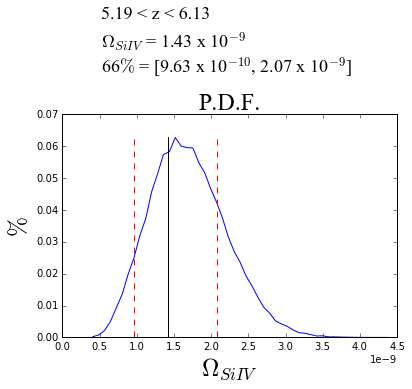

In [8]:
# create pdf and get 66% interval
pdf = np.zeros(len(bins))
for b in range(0, len(bins) - 1):
    local_index = np.where((local_omega_s5 >= bins[b]) & (local_omega_s5 < bins[b+1]))
    pdf[b] = len(local_omega_s5[local_index])
    
total_pdf = sum(pdf)
for p in range(0, len(pdf) - 1):
    pdf[p] = pdf[p]/total_pdf

# plot and check the pdf
plt.plot(bins, pdf)

# get the where the maximum value is located at  
# and dereference the np.where call into an array
max_index = np.where(pdf == max(pdf))
index_array = np.array(list(range(len(pdf))))
a = np.array(index_array[max_index])

# use a do while loop to calculate the 66% boundary interval
step = 1.0
boundary = sum(pdf[a])
while boundary <= 0.66:
    boundary = boundary + pdf[np.int(a[0]-step)]  + pdf[np.int(a[0]+step)] 
    step = step + 1

omega_value = sum(pow(10.0, local_si4_systems.c_d))*a_z2*si4_norm/dx_z2
    
plt.plot([bins[np.int(a[0]-step)], bins[np.int(a[0]-step)]], 
         [0, max(pdf)], 'r--')
plt.plot([bins[np.int(a[0]+step)], bins[np.int(a[0]+step)]], 
         [0, max(pdf)], 'r--')
plt.plot([omega_value, omega_value], 
         [0, max(pdf)], 'k-')
#plot labels
plt.ylabel('$\%$', **hfont,  fontsize=24)
plt.xlabel('$\Omega_{SiIV}$', **hfont,  fontsize=24)
plt.title('P.D.F.',  **hfont,  fontsize=24)
plt.text(0.52*10.0**(-9), 0.1, '5.19 < z < 6.13', **hfont,  fontsize=18)
plt.text(0.52*10.0**(-9), 0.091, '$\Omega_{SiIV}$ = 1.43 x 10$^{-9}$', **hfont,  fontsize=18)
plt.text(0.52*10.0**(-9), 0.083, '66$\%$ = [9.63 x 10$^{-10}$, 2.07 x 10$^{-9}$]', **hfont,  fontsize=18)

plt.savefig('si4_z2_bootstrap.png', bbox_inches='tight', figsize=[12,9], dpi=500)

print('omega value: ', omega_value)
print('66% boundary is: ', bins[np.int(a[0]-step)], bins[np.int(a[0]+step)])